<a href="https://colab.research.google.com/github/blessondensil294/IOT-Traffic-Management/blob/master/JanataHack_IOT_Traffic_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JanataHack: Machine Learning for IoT

IoT devices are becoming popular nowadays. The widespread use of IoT yields huge amounts of raw data. This data can be effectively processed by using machine learning to derive many useful insights that can become game changers and affect our lives deeply.

ML is becoming an essential player in a growing array of process areas involving image recognition, natural language processing, forecasting, prediction, and process optimization. ML is evolving to the point of being able to draw interesting patterns and inferences from these real time data streams, and make those results available to analysts as well as to embed them directly in business processes.

This weekend we bring to you a challenge providing all of you with an opportunity to work with sensor data and solve an interesting IOT problem.

You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting. 

Your task

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.

Data Dictionary

Variable	Description

ID - Unique ID

DateTim - Hourly Datetime Variable

Junction - Junction Type

Vehicles - Number of Vehicles (Target)

## Load the Data

In [0]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/IOT-Traffic-Management/master/Data/test_BdBKkAj_L87Nc3S.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/IOT-Traffic-Management/master/Data/train_aWnotuB.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [2]:
df_Train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
df_Train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [6]:
df_Train.shape

(48120, 4)

In [8]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df_Train.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

## Feature Engineering

In [78]:
from datetime import datetime
import time
df_Train['DateTime'] = pd.to_datetime(df_Train['DateTime'])
df_Test['DateTime'] = pd.to_datetime(df_Test['DateTime'])
df_Train['Weekday'] = [datetime.weekday(date) for date in df_Train.DateTime]
df_Test['Weekday'] = [datetime.weekday(date) for date in df_Test.DateTime]
df_Train['Year'] = df_Train['DateTime'].dt.year
df_Test['Year'] = df_Test['DateTime'].dt.year
df_Train['Month'] = df_Train['DateTime'].dt.month
df_Test['Month'] = df_Test['DateTime'].dt.month
df_Train['Day'] = df_Train['DateTime'].dt.day
df_Test['Day'] = df_Test['DateTime'].dt.day
df_Train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_Train.DateTime]
df_Test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_Test.DateTime]
df_Train['Week'] = df_Train['DateTime'].dt.week
df_Test['Week'] = df_Test['DateTime'].dt.week
df_Train['Quarter'] = df_Train['DateTime'].dt.quarter
df_Test['Quarter'] = df_Test['DateTime'].dt.quarter
df_Train.head()

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Time,Week,Quarter
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,3600,44,4
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,7200,44,4
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,10800,44,4
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,14400,44,4


## Data Visualizarion

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Total Plot Based on Traffic of Date and Time

In [0]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(50,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

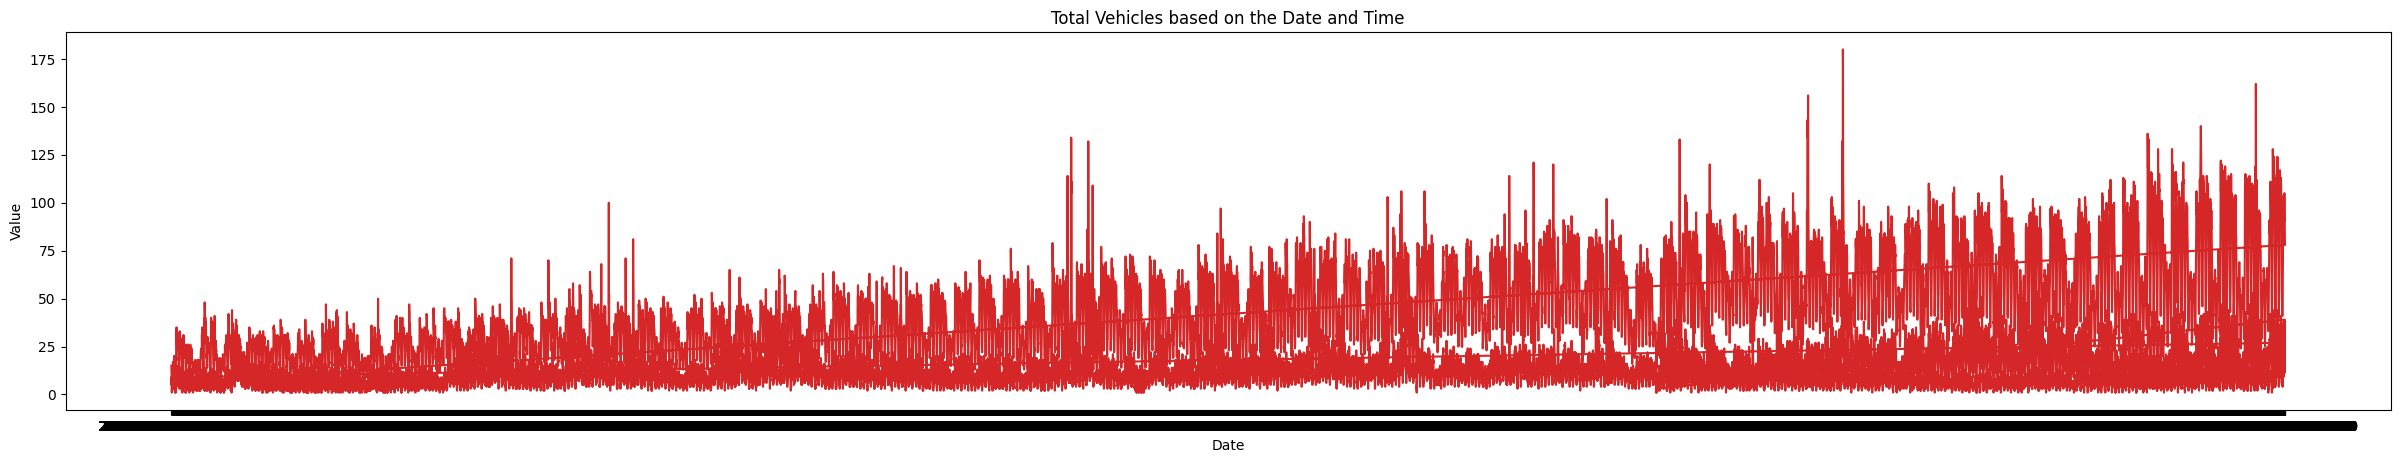

In [46]:
plot_df(df_Train, x=df_Train['DateTime'], y=df_Train['Vehicles'], title='Total Vehicles based on the Date and Time')

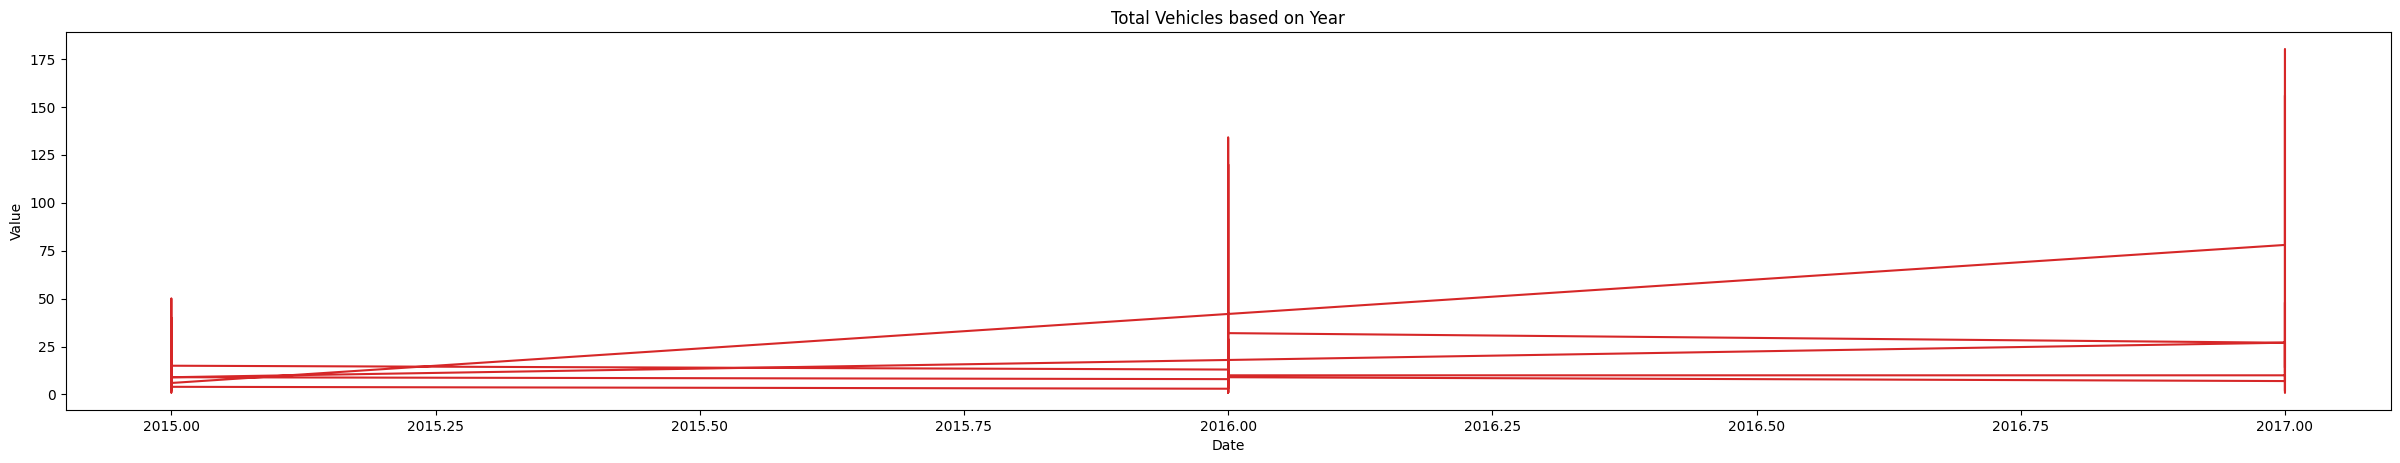

In [55]:
plot_df(df_Train, x=df_Train['Year'], y=df_Train['Vehicles'], title='Total Vehicles based on Year')

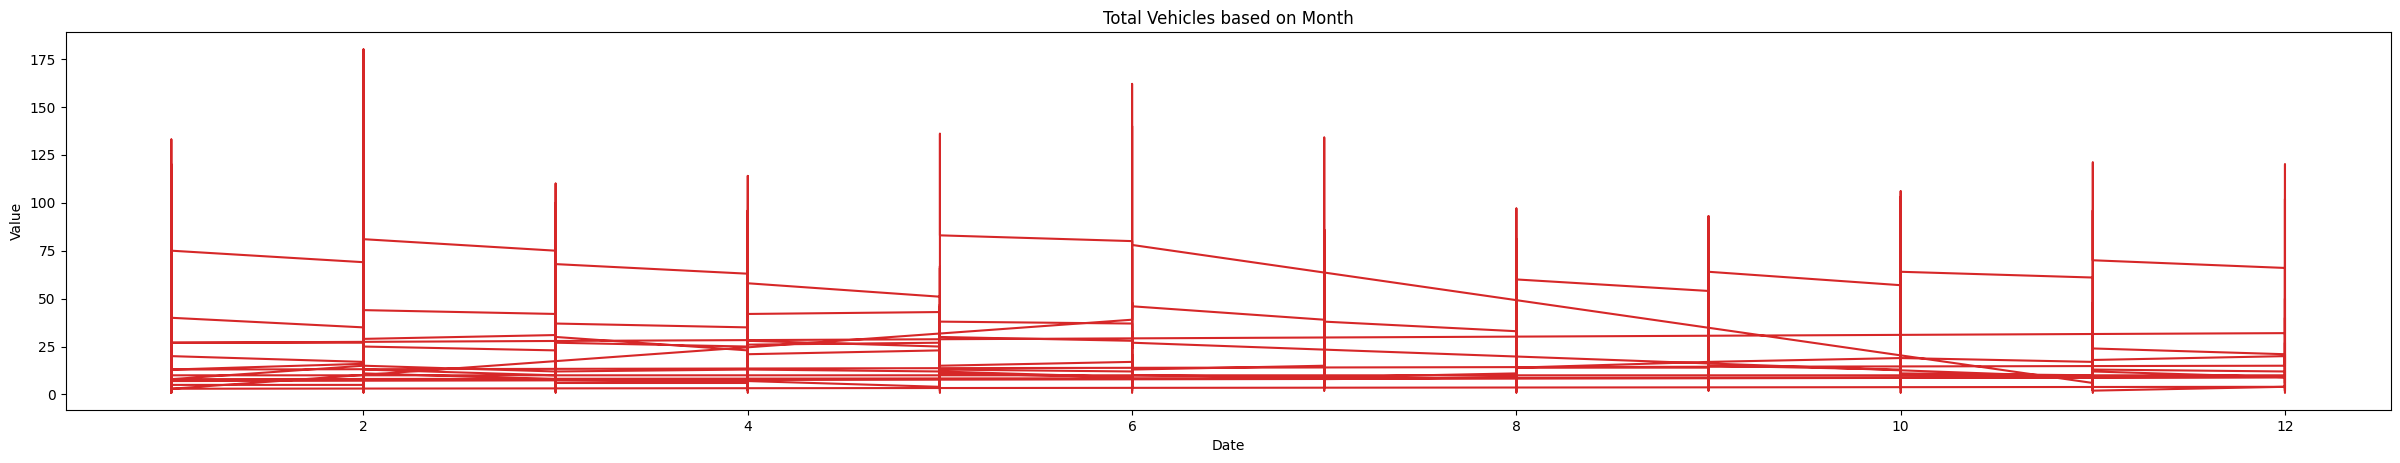

In [57]:
plot_df(df_Train, x=df_Train['Month'], y=df_Train['Vehicles'], title='Total Vehicles based on Month')

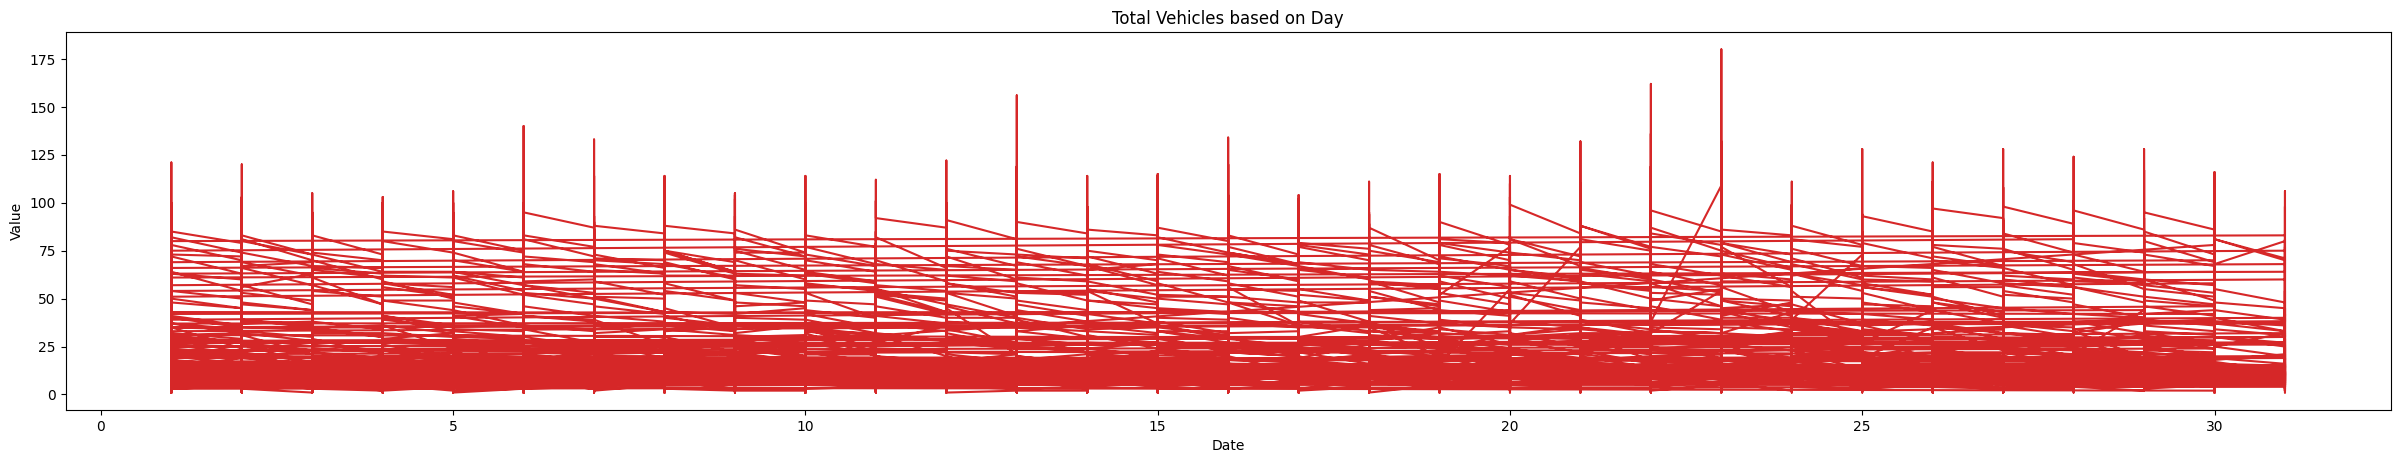

In [58]:
plot_df(df_Train, x=df_Train['Day'], y=df_Train['Vehicles'], title='Total Vehicles based on Day')

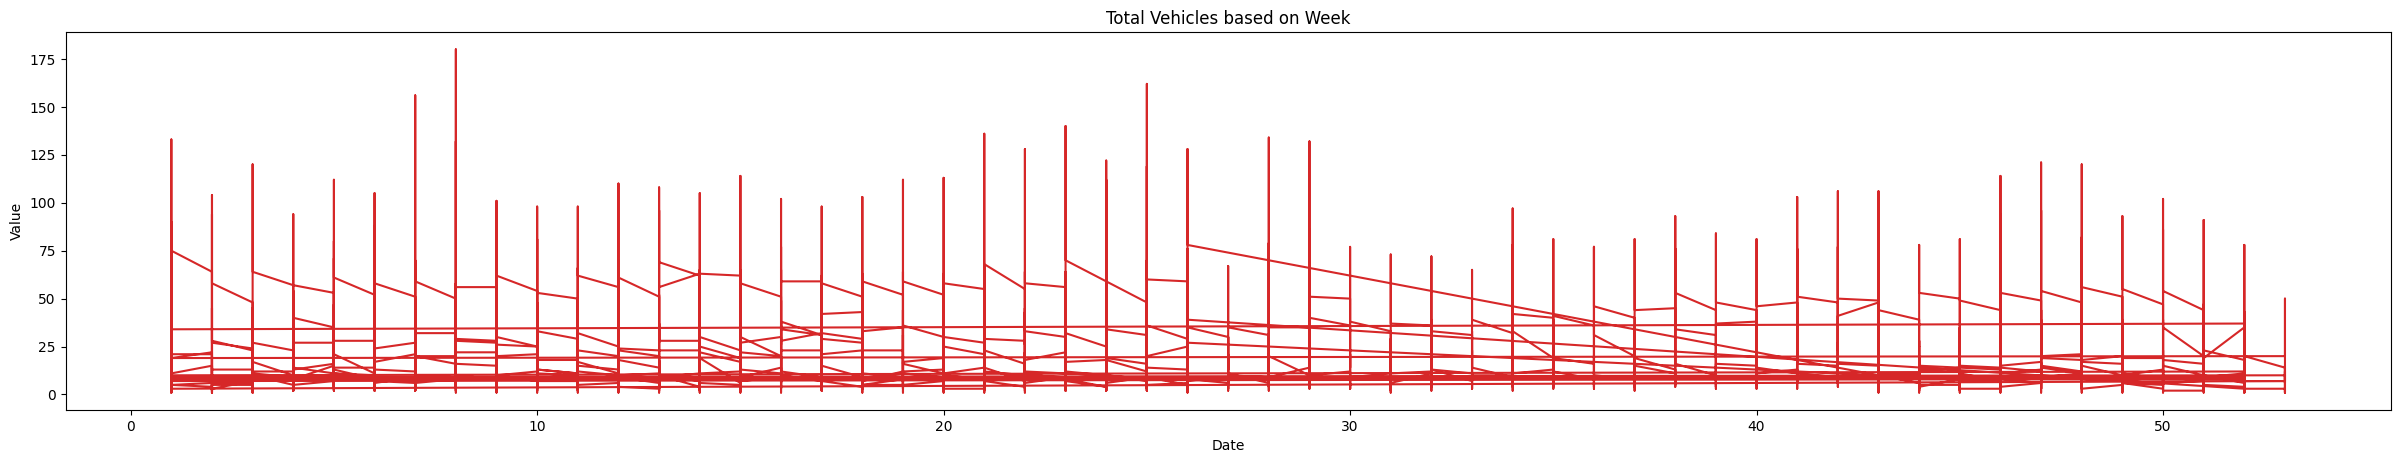

In [59]:
plot_df(df_Train, x=df_Train['Week'], y=df_Train['Vehicles'], title='Total Vehicles based on Week')

### Seasonal Plot of Time Series

In [0]:
years = df_Train['Year'].unique()
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

TypeError: ignored

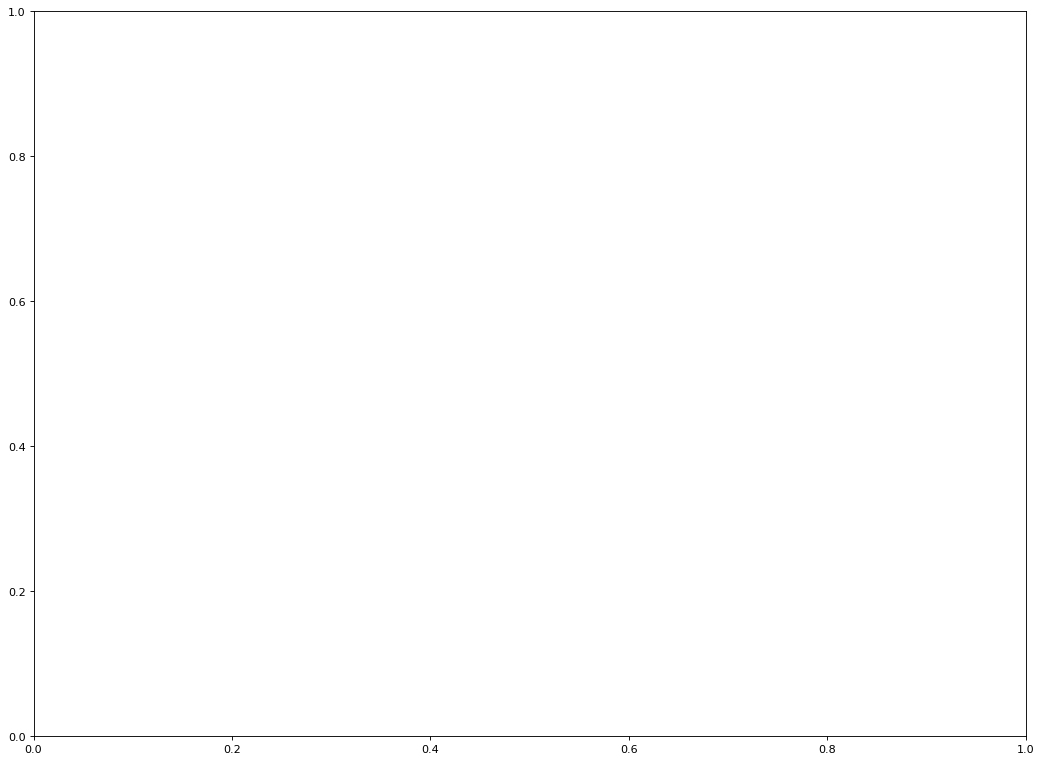

In [60]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot(df_Train['Month'], df_Train['Vehicles'], data=df_Train.loc[df_Train.Year==y, :], color=mycolors[i], label=y)
        plt.text(df_Train.loc[df_Train.Year==y, :].shape[0]-.9, df_Train.loc[df_Train.Year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='Traffic', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Traffic in Time Series", fontsize=20)
plt.show()

## Data Modeling

### Extra Tree Classifier

In [0]:
def datetosec(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()

In [86]:
df_Train_f = df_Train.drop(['Vehicles','ID'], axis=1)
df_Train_f = datetosec(df_Train_f)
x = df_Train_f.values
x

array([[1.4463360e+09, 1.0000000e+00, 6.0000000e+00, ..., 0.0000000e+00,
        4.4000000e+01, 4.0000000e+00],
       [1.4463396e+09, 1.0000000e+00, 6.0000000e+00, ..., 3.6000000e+03,
        4.4000000e+01, 4.0000000e+00],
       [1.4463432e+09, 1.0000000e+00, 6.0000000e+00, ..., 7.2000000e+03,
        4.4000000e+01, 4.0000000e+00],
       ...,
       [1.4988564e+09, 4.0000000e+00, 4.0000000e+00, ..., 7.5600000e+04,
        2.6000000e+01, 2.0000000e+00],
       [1.4988600e+09, 4.0000000e+00, 4.0000000e+00, ..., 7.9200000e+04,
        2.6000000e+01, 2.0000000e+00],
       [1.4988636e+09, 4.0000000e+00, 4.0000000e+00, ..., 8.2800000e+04,
        2.6000000e+01, 2.0000000e+00]])

In [87]:
y = df_Train['Vehicles'].values
y

array([15, 13, 10, ..., 16, 22, 12])

In [0]:
tree_clf.fit(x,y)